In [0]:
!pip install tensorflow==2.0.0 -q

In [0]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [46]:
!wget = https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-03-21 10:27:36--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-03-21 10:27:36--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-03-21 10:27:36 (47.4 MB/s) - ‘moore.csv.2’ saved [2302/2302]

FINISHED --2020-03-21 10:27:36--
Total wall clock time: 0.08s
Downloaded: 1 files, 2.2K in 0s (47.4 MB/s)


In [47]:
!ls

moore.csv  moore.csv.1	moore.csv.2  sample_data


In [0]:
data = pd.read_csv('moore.csv', header=None).values
#data.shape 

In [0]:
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

In [0]:
Y = np.log(Y)

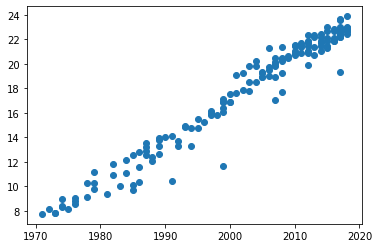

In [51]:
plt.scatter(X,Y)

In [0]:
#preprocessing performed on x
X = X - X.mean()

In [53]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9),
    loss = 'mse'
    
)


def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200


162/162 [==============================] - 0s 1ms/sample - loss: 344.3122
Epoch 2/200
162/162 [==============================] - 0s 85us/sample - loss: 342.4430
Epoch 3/200
162/162 [==============================] - 0s 78us/sample - loss: 248.8164
Epoch 4/200
162/162 [==============================] - 0s 74us/sample - loss: 218.7861
Epoch 5/200
162/162 [==============================] - 0s 76us/sample - loss: 185.8620
Epoch 6/200
162/162 [==============================] - 0s 81us/sample - loss: 163.9296
Epoch 7/200
162/162 [==============================] - 0s 69us/sample - loss: 110.7048
Epoch 8/200
162/162 [==============================] - 0s 72us/sample - loss: 65.9331
Epoch 9/200
162/162 [==============================] - 0s 75us/sample - loss: 51.1277
Epoch 10/200
162/162 [==============================] - 0s 74us/sample - loss: 36.4652
Epoch 11/200
162/162 [==============================] - 0s 76us/sample - loss: 35.1536
Epoch 12/200
162/162 [==============================] - 0s

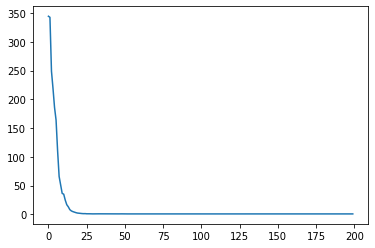

In [54]:
plt.plot(r.history['loss'], label = 'loss')

In [55]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34170938]], dtype=float32), array([17.750515], dtype=float32)]


In [56]:
#Calculating slope
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.34170938


In [57]:
print("Time to double: " + str(np.log(2)/a))

Time to double: 2.0284698942958337


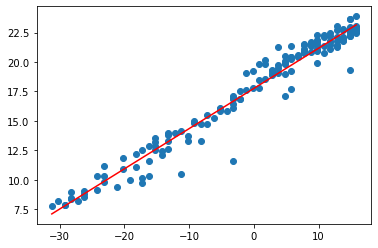

In [58]:
#Making a prediction
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat, color='red')

In [0]:
#Manual Calculations
w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

In [0]:
Yhat2 = (X.dot(w) + b).flatten()

In [63]:
np.allclose(Yhat,Yhat2)

True